# Customer Segmentation

##### USE CASE: Customer Segmentation based on Annual income The dataset is a very simple data just to demonstrate with code how k-means works. REQUIRED PYTHON LIBRARIES
● Numpy
● Pandas
● Matlplotlib
● ScikitLearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#umport the dataset
df = pd.read_csv("Mall_Customers.csv")
print(df.shape)
df.head()

(200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
x = df.iloc[:, [2,3,4]]
y = df.iloc[:, 3]
x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [6]:
y

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64

Text(0.5, 1.0, 'Clusters before K-means')

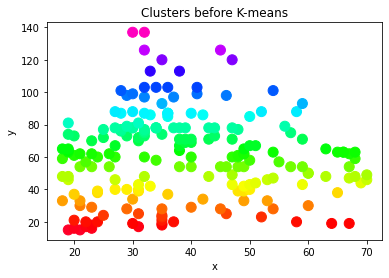

In [8]:
#Visualize data points before Clustering
plt.figure(figsize=(6,4))
plt.scatter(x.iloc[:,0],x.iloc[:,1], c=y, s=100, cmap="gist_rainbow")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Clusters before K-means")

In [12]:
#Split Dataset into Train and test set for model development
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 0)

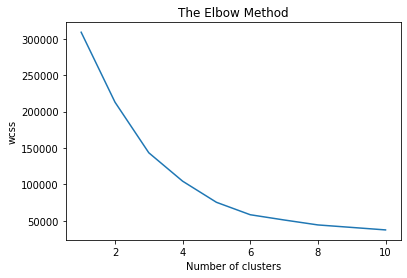

In [14]:
#using the Elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
#Initiate wcss using empty list
wcss =[]
#initiate iteration process using a for loop
for i in range(1, 11):
    kmeans=KMeans(n_clusters = i, init = "k-means++", random_state = 42)
    kmeans.fit(x)
    #Append results to wcss list
    wcss.append(kmeans.inertia_)
#plot results
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

###### As can be seen, the optimal value of k is 5.

In [15]:
#fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state=42)
y_kmeans =kmeans.fit_predict(x)

In [17]:
#centers identified and calculates
centers=kmeans.cluster_centers_
centers

array([[45.2173913 , 26.30434783, 20.91304348],
       [32.69230769, 86.53846154, 82.12820513],
       [40.32432432, 87.43243243, 18.18918919],
       [43.12658228, 54.82278481, 49.83544304],
       [25.27272727, 25.72727273, 79.36363636]])

In [18]:
kmeans.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

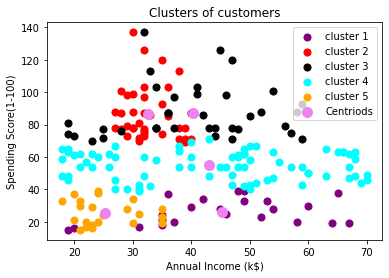

In [25]:
#convert x to an np array
x_1=np.array(x)
#vissualizinf the clusters
#1st cluster
plt.scatter(x_1[y_kmeans==0,0],x_1[y_kmeans==0,1],s=50,c="purple",label="cluster 1")
#2nd cluster
plt.scatter(x_1[y_kmeans==1,0],x_1[y_kmeans==1,1],s=50,c="red",label="cluster 2")
#3rd cluster
plt.scatter(x_1[y_kmeans==2,0],x_1[y_kmeans==2,1],s=50,c="black",label="cluster 3")
#4th cluster
plt.scatter(x_1[y_kmeans==3,0],x_1[y_kmeans==3,1],s=50,c="cyan",label="cluster 4")
#5th cluster
plt.scatter(x_1[y_kmeans==4,0],x_1[y_kmeans==4,1],s=50,c="orange",label="cluster 5")
#Number of centriods against labels
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,c="violet",label="Centriods")
plt.title("Clusters of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score(1-100)")
plt.legend()

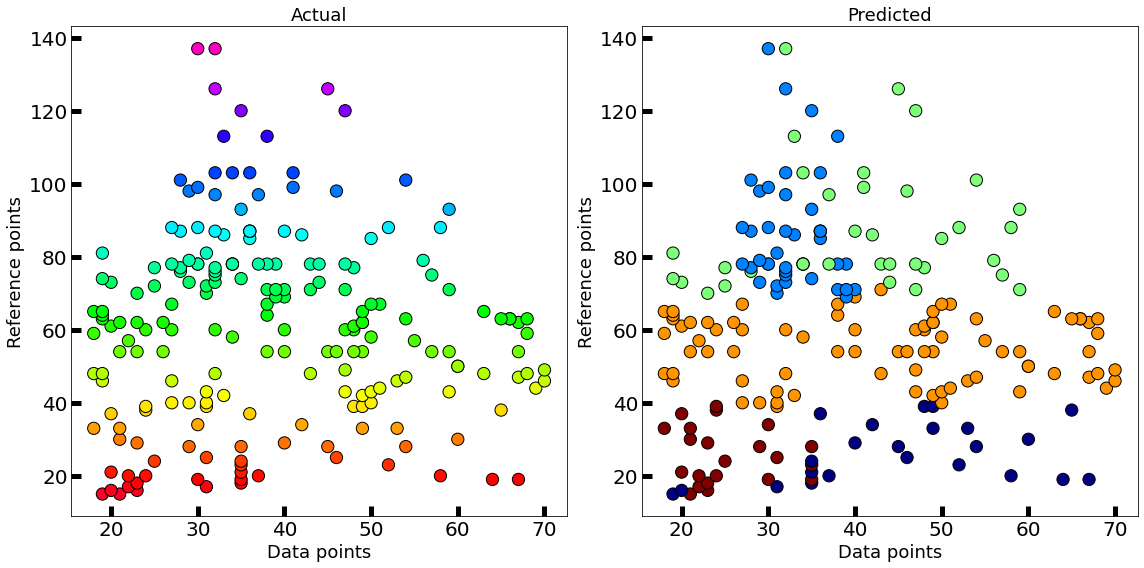

In [26]:
#visualizing clusters after k-means
new_labels=kmeans.labels_
#visualiz data with reference to before and after k-means clustering
#actual vs predicted plot
fig, axes = plt.subplots(1,2, figsize=(16,8))
axes[0].scatter(x.iloc[:,0],x.iloc[:,1], c=y,
    cmap="gist_rainbow", edgecolor="k",s=150)
axes[1].scatter(x.iloc[:,0],x.iloc[:,1], c=new_labels,
    cmap="jet", edgecolor="k",s=150)
axes[0].set_xlabel("Data points", fontsize=18)
axes[0].set_ylabel("Reference points", fontsize=18)
axes[1].set_xlabel("Data points", fontsize=18)
axes[1].set_ylabel("Reference points", fontsize=18)
axes[0].tick_params(direction="in", length=10, width=5, colors="k", labelsize=20)
axes[1].tick_params(direction="in", length=10, width=5, colors="k", labelsize=20)
axes[0].set_title("Actual", fontsize=18)
axes[1].set_title("Predicted", fontsize=18)
plt.tight_layout()

In [27]:
#using the YelloBrickVisualizer lib
from yellowbrick.cluster import KElbowVisualizer 

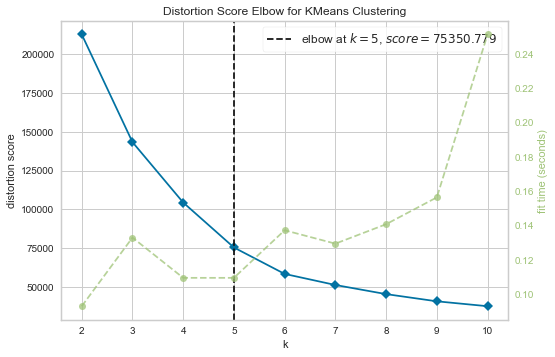

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
model = KMeans()
visualizer = KElbowVisualizer(model,k=(2,11))

visualizer.fit(x)
visualizer.show()